In [14]:
import matplotlib
# Force matplotlib to not use any Xwindows backend.
matplotlib.use('Agg')
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2
import numpy as np
from spacepy import coordinates as coord
from spacepy.time import Ticktock

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# --------------- Latex Plot Beautification --------------------------
fig_width_pt = 650.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = 6 #fig_width_pt*inches_per_pt  # width in inches
fig_height = 6 # fig_width*golden_mean*2      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 20,
          'text.fontsize': 16,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)

# --------------- Latex Plot Beautification --------------------------



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


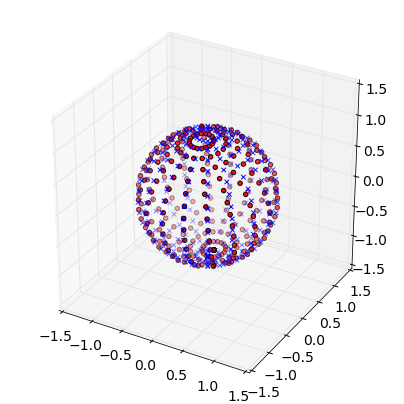

In [41]:
latv = np.arange(-90,90, step=10)
lonv = np.arange(-180,180, step=20)

lats, lons = np.meshgrid(latv, lonv)
lats = lats.flatten()
lons = lons.flatten()
alts = np.ones_like(lats)

cvals = coord.Coords(zip(alts, lats, lons), 'GEO', 'sph',units=['Re','deg','deg'])
cvals.ticks = Ticktock(np.tile(['2012-03-02T23:00:00'], len(lats)), 'ISO') # add ticks

cvals = cvals.convert('GEO','car')
# cvals = coord.Coords([[1,2,4],[1,2,2]], 'GEO', 'car')
# cvals.ticks = Ticktock(['2002-02-02T12:00:00', '2002-02-02T12:00:00'], 'ISO') # add ticks

newvals = cvals.convert('SM','car')
# print cvals.lati
# print cvals.long

# print newvals.x
# print newvals.y
# print newvals.z

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newvals.x, newvals.y, newvals.z, c='red', marker='o')
ax.scatter(cvals.x, cvals.y, cvals.z, c='blue', marker='x')

# ax.set_xlim([-2,2])
# ax.set_ylim([-2,2])
# ax.set_zlim([-2,2])



In [158]:
from spacepy.coordinates import Coords
y = Coords([[1,2,4],[1,2,2]], 'GEO', 'car')
from spacepy.time import Ticktock
y.ticks = Ticktock(['2002-02-02T12:00:00', '2002-02-02T12:00:00'], 'ISO')
x = y.convert('MAG','car')
x

Coords( [[-2.277616824590977, 1.5777898409282112, 3.6500740839336188], [-1.9181472293029933, 1.5777898409282112, 1.6826438793104679]] , 'MAG', 'car')

In [42]:
Ticktock?